In [1]:
from sklearn import preprocessing
from sklearn import linear_model,svm,gaussian_process
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn import metrics
from xgboost import XGBRegressor#XGB迴歸也來一組參數
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
%matplotlib inline

In [2]:
import pandas as pd
from sklearn import datasets
data = pd.read_csv('C:\\Users\\kikok\\Downloads\\dataset\\train.csv')

In [3]:
cols=['building_area','land_area','parking_price'
      ,'master_rate','bachelor_rate','doc_Rate','village_income_median','XIII_5000',
      'jobschool_rate','VII_5000'
      ,'V_5000','VII_1000','V_1000','XIII_10000',
      'IX_5000','VII_10000','XI_10000','V_500','VI_10000']
data = data.fillna(data.mean()) 
x = data[cols].values
y =  np.log1p(data['total_price'].values)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state = 42)

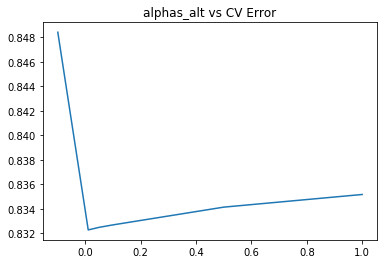

In [4]:
alphas_alt = [-0.1,0.01,0.05,0.1,0.5,1]
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
test_scores = []
for alpha in alphas_alt:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=kfolds, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(alphas_alt, test_scores)
plt.title("alphas_alt vs CV Error");

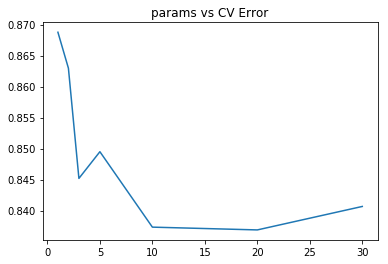

In [9]:
rigit = Ridge(0.001)
params = [1,2,3,5, 10,20,30]
test_scores = []
for alpha in params:
    clf = BaggingRegressor(n_estimators=alpha, base_estimator=rigit)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=kfolds, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)
plt.title("params vs CV Error");

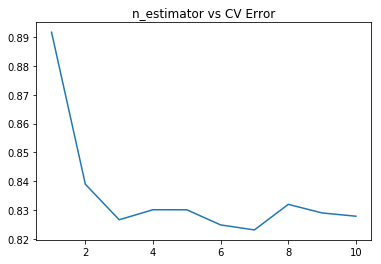

In [6]:
params = [1, 2, 3, 4,5,6,7,8,9,10]
test_scores = []
for param in params:
    clf = AdaBoostRegressor(n_estimators=param, base_estimator=rigit)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=kfolds, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

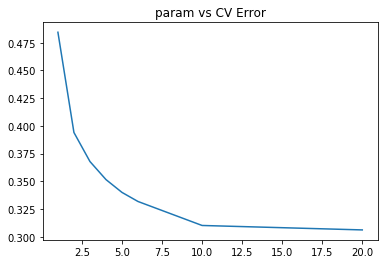

In [10]:
params = [1,2,3,4,5,6,10,20]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param,base_estimator=rigit)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=kfolds,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params, test_scores)
plt.title("param vs CV Error");

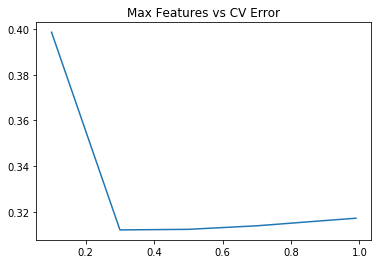

In [8]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

In [11]:
rigit = Ridge(0.001)
bag = BaggingRegressor(n_estimators=20, base_estimator=rigit)
ada = AdaBoostRegressor(n_estimators=7, base_estimator=rigit)
xgb = XGBRegressor(max_depth=20,base_estimator=rigit)
rf = RandomForestRegressor(n_estimators=500, max_features=0.3)

bag.fit(X_train, y_train)
ada.fit(X_train, y_train)
xgb.fit(X_train, y_train)
rigit.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
print("rf score: " + str(rf.score(X_train, y_train)))
print("rigit score: " + str(rigit.score(X_train, y_train)))
print("bag score: " + str(bag.score(X_train, y_train)))
print("ada score: " + str(ada.score(X_train, y_train)))
print("xgb score: " + str(xgb.score(X_train, y_train)))

rf score: 0.989354125496
rigit score: 0.516168755881
bag score: 0.514168630596
ada score: 0.498725335934
xgb score: 0.996154630018


In [13]:
test_data = pd.read_csv('C:\\Users\\kikok\\Downloads\\dataset\\test.csv')
test_data = test_data.fillna(data.mean())
x_test_data = test_data[cols].values


In [15]:
#y_ridge = rigit.predict(x_test_data)
y_rf = np.expm1(rf.predict(x_test_data))
#y_bagging = bag.predict(x_test_data)
#y_adaboost = ada.predict(x_test_data)
y_xgb =  np.expm1(xgb.predict(x_test_data))

In [ ]:
y_rf

In [20]:
y_final = (y_rf + y_xgb) / 2

In [21]:
prediction = pd.DataFrame(y_rf,columns=['total_price'])
result = pd.concat((test_data['building_id'],prediction),axis=1)


In [22]:

result.to_csv('C:\\Users\\kikok\\Downloads\\dataset\\submit_test_20190508_mean_plus_19_plus_rf_xgb_plus_log_model.csv',index=False)